In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mystyle
plt.style.use(mystyle.ms)

In [2]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
print('We have {} stars'.format(len(ati)))
ati.head(5)

We have 95 stars


,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,i,l_i,u_i,nus,l_nus,u_nus,P,l_P,u_P,flag
0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,0.3513,...,1.178398,1.064167,1.251533,1.671453,1.593461,1.813538,6.924557,6.382040,7.263483,NaN
1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,0.1757,...,1.199428,1.166976,1.233080,3.345075,3.283668,3.412607,3.460034,3.391563,3.524739,NaN
2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,0.2396,...,0.891136,0.570728,1.303701,0.424040,0.320092,0.693356,27.294770,16.692830,36.158605,NaN
3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,0.1278,...,0.577564,0.539859,0.614492,2.126247,2.023164,2.228384,5.443428,5.193932,5.720778,NaN
4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,0.1757,...,1.217700,1.106743,1.386214,1.034966,0.972231,1.100373,11.183052,10.518321,11.904653,NaN


Exclude those stars with a Rhat > 1.1 flag and no results otherwise

In [3]:
ati = ati[np.isfinite(ati.nus.values)]
ati = ati[ati.flag != 'rhat_1' ]
print('We have {} stars'.format(len(ati)))

We have 78 stars


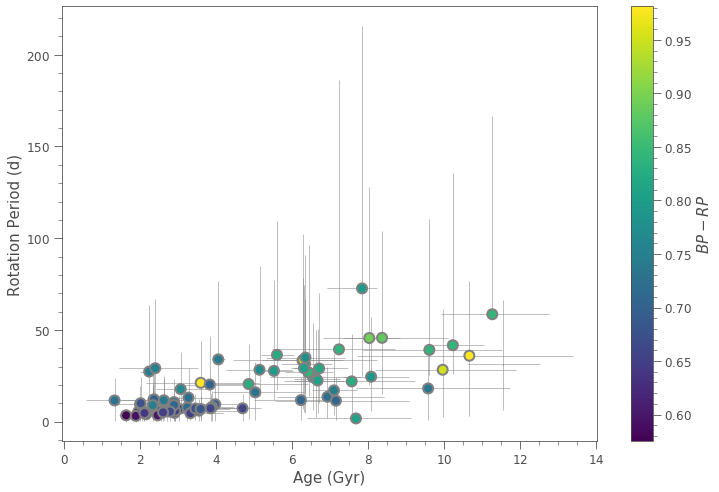

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
c = ax.scatter(ati.age, ati.P, c=ati.bprp, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.age, ati.P, xerr=[ati.loage, ati.upage], yerr=[ati.l_P, ati.u_P],
            fmt='|', zorder=1, color='grey')
# ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Age (Gyr)')
ax.set_ylabel('Rotation Period (d)')
fig.colorbar(c,label=r'$BP-RP$')
plt.show()



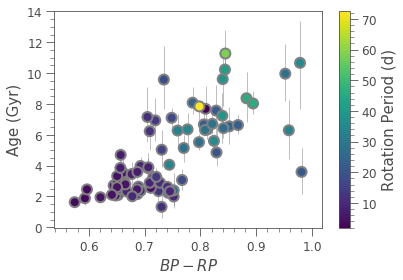

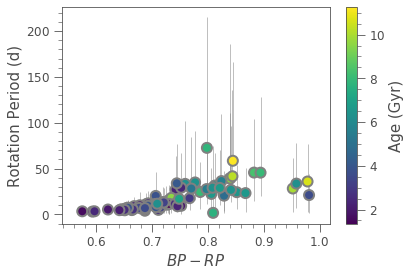

In [7]:
fig, ax = plt.subplots()
c = ax.scatter(ati.Teff, ati.P, c=ati.age, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.Teff, ati.P, xerr=ati.eTeff, yerr=[ati.l_P, ati.u_P],
            fmt='|', zorder=1, color='grey')
# ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel(r'$T_{\rm eff}$ ($K$)')
ax.set_ylabel('Rotation Period (d)')
plt.gca().invert_xaxis()
fig.colorbar(c,label=r'Age (Gyr)')
plt.show()        

fig, ax = plt.subplots()
c = ax.scatter(ati.bprp, ati.age, c=ati.P, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.bprp, ati.age, yerr=[ati.loage, ati.upage],
            fmt='|', zorder=1, color='grey')    
ax.set_ylabel('Age (Gyr)')
ax.set_xlabel(r'$BP-RP$')
fig.colorbar(c,label='Rotation Period (d)')
plt.show()

fig, ax = plt.subplots()
c = ax.scatter(ati.bprp, ati.P, c=ati.age, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.bprp, ati.P, yerr=[ati.l_P, ati.u_P],
            fmt='|', zorder=1, color='grey')        
ax.set_xlabel(r'$BP-RP$')
ax.set_ylabel('Rotation Period (d)')
fig.colorbar(c,label='Age (Gyr)')
plt.show()